In [5]:
import numpy as np
import matplotlib.pyplot as plt

## hadamard

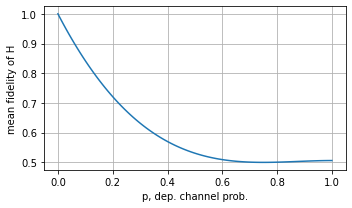

In [6]:
p = np.linspace(0,1,100)
p_flip = 2*p/3
p00 = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
p01 = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4
p10 = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
p11 = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)

# plt.plot(p,p00+p01+p11+p10)

F_avg = 0.5 + (3*p00-p01-p10-p11)/6 ## Eq.(18) of quant-ph/0205035
plt.figure(figsize=(5,3))
plt.plot(p,F_avg)
plt.xlabel("p, dep. channel prob.")
plt.ylabel("mean fidelity of H")
plt.grid()
plt.tight_layout()
# plt.savefig("figs/fidelity_H.pdf")
plt.show()

## qiskit

In [1]:
# Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

# Import Qiskit classes 
import qiskit
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

# Generate RB circuits (2Q RB)

# number of qubits
nQ = 3
rb_opts = {}
#Number of Cliffords in the sequence
rb_opts['length_vector'] = [1, 10, 20, 50, 75, 100, 125, 150, 175, 200]
# Number of seeds (random sequences)
rb_opts['nseeds'] = 5
# Default pattern
rb_opts['rb_pattern'] = [np.arange(nQ)]

rb_circs, xdata = rb.randomized_benchmarking_seq(**rb_opts)

/tmp/ipykernel_4494/4005703646.py:7: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  import qiskit.ignis.verification.randomized_benchmarking as rb


In [2]:
rb_circs[0][0].draw()

┌───┐ ┌───┐┌───┐                                ┌─────┐┌───┐            »
qr_0: ─┤ Y ├─┤ H ├┤ S ├─────────────────────────────■──┤ Sdg ├┤ H ├──■─────────»
       ├───┤ └───┘└───┘┌─────┐┌───┐                 │  └─────┘└───┘┌─┴─┐┌─────┐»
qr_1: ─┤ X ├────────■──┤ Sdg ├┤ H ├──■──────────────┼──────────────┤ X ├┤ Sdg ├»
      ┌┴───┴┐┌───┐┌─┴─┐├─────┤├───┤┌─┴─┐┌───┐┌───┐┌─┴─┐┌─────┐┌───┐└───┘└─────┘»
qr_2: ┤ Sdg ├┤ H ├┤ X ├┤ Sdg ├┤ H ├┤ X ├┤ H ├┤ S ├┤ X ├┤ Sdg ├┤ H ├────────────»
      └─────┘└───┘└───┘└─────┘└───┘└───┘└───┘└───┘└───┘└─────┘└───┘            »
cr: 3/═════════════════════════════════════════════════════════════════════════»
                                                                               »
«            ░                ┌───┐┌───┐     ┌─────┐┌───┐┌───┐     ┌─┐     »
«qr_0: ──────░─────────────■──┤ H ├┤ S ├──■──┤ Sdg ├┤ H ├┤ Y ├─────┤M├─────»
«      ┌───┐ ░ ┌───┐┌───┐┌─┴─┐└───┘└───┘  │  └─────┘└───┘└───┘┌───┐└╥┘┌───┐»
«qr_1: ┤ H ├─░─┤ H ├┤ S ├┤ X ├────────────┼────────────────■──┤ H ├─╫─┤ S ├»
«      └───┘ ░ ├───┤├───┤└───┘          ┌─┴─┐┌─────┐┌───┐┌─┴─┐├───┤ ║ ├───┤»
«qr_2: ──────░─┤ H ├┤ S ├───────────────┤ X ├┤ Sdg ├┤ H ├┤ X ├┤ H ├─╫─┤ S ├»
«            ░ └───┘└───┘               └───┘└─────┘└───┘└───┘└───┘ ║ └───┘»
«cr: 3/═════════════════════════════════════════════════════════════╩══════»
«                                                                   0      »
«                           
«qr_0: ─────────────────────
«           ┌───┐     ┌─┐   
«qr_1: ──■──┤ X ├─────┤M├───
«      ┌─┴─┐├───┤┌───┐└╥┘┌─┐
«qr_2: ┤ X ├┤ H ├┤ S ├─╫─┤M├
«      └───┘└───┘└───┘ ║ └╥┘
«cr: 3/════════════════╩══╩═
«                      1  2

In [3]:
# Create a new circuit without the measurement
qregs = rb_circs[0][-1].qregs
cregs = rb_circs[0][-1].cregs
qc = qiskit.QuantumCircuit(*qregs, *cregs)
for i in rb_circs[0][-1][0:-nQ]:
    qc.data.append(i)

In [4]:
# The Unitary is an identity (with a global phase)
sim = qiskit.Aer.get_backend('aer_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
qc.save_unitary()
unitary = sim.run(qc).result().get_unitary()
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Unitary} = ")

<IPython.core.display.Latex object>

In [42]:
# Run on a noisy simulator
from qiskit.providers.aer.noise import pauli_error

noise_model = NoiseModel()

p_flip = 0.001
## hadmard/S error rates
p0 = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
px = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4
pz = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
py = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
error_h = pauli_error([('I', p0), ('Z', pz), ('X', px), ('Y', py)])
error_s = pauli_error([('I', p0), ('Z', px), ('X', pz), ('Y', py)])

noise_model.add_all_qubit_quantum_error(error_h, 'h')
noise_model.add_all_qubit_quantum_error(error_s, 's')


def Hilbertspace_Zr(N,r):
    states=np.zeros((r**N,N),dtype=int)
    if N>0:
        for i_1 in range(r**N):
            num_str=np.base_repr(i_1,base=r)[::-1]
            for i_2 in range(len(num_str)):
                states[i_1,i_2]=int(num_str[i_2])
    else:
        states=[[0]]
        
    return states

Nq = 14
vec = Hilbertspace_Zr(Nq,2)
err_vec = np.zeros((16,Nq+1),dtype=int)
for i in range(2**Nq):
    s_flip=vec[i,:]    
    sz_c = np.sum(vec[i,[0,2,3,4,7,8,10]])
    sx_c = np.sum(vec[i,[1,2,4,5]])
    sz_t = np.sum(vec[i,[8,10,12]])
    sx_t = np.sum(vec[i,[1,2,7,9,11,13]])
    p_exp = np.sum(vec[i,:])
    
    i_e = np.array([sz_c%2,sx_c%2,sz_t%2,sx_t%2])@ (2**np.arange(4))
    err_vec[i_e,p_exp] += 1
    
p_vec = p_flip**np.arange(15)*(1-p_flip)**np.arange(14,-1,-1)
err_prob = err_vec @ p_vec
pauli_vec = Hilbertspace_Zr(4,2)
pauli_combined = []
for i in range(16):
    p_st = ''
    p1 = pauli_vec[i,:2]@ np.array([1,2])
    if  p1 == 0:
        p_st += 'I'
    elif  p1 == 1:
        p_st += 'Z'
    elif  p1 == 2:
        p_st += 'X'
    else:
        p_st += 'Y'
    p2 = pauli_vec[i,2:]@ np.array([1,2])
    if  p2 == 0:
        p_st += 'I'
    elif  p2 == 1:
        p_st += 'Z'
    elif  p2 == 2:
        p_st += 'X'
    else:
        p_st += 'Y'

    pauli_combined.append((p_st,err_prob[i]))
# print(pauli_combined)
two_bit_flip = pauli_error(pauli_combined)

noise_model.add_all_qubit_quantum_error(two_bit_flip, 'cx')

backend = qiskit.Aer.get_backend('aer_simulator')

In [43]:
# Create the RB fitter
backend = qiskit.Aer.get_backend('aer_simulator')
basis_gates = ['u1','u2','u3','cx'] 
shots = 200
transpiled_circs_list = []
rb_fit = rb.RBFitter(None, xdata, rb_opts['rb_pattern'])
for rb_seed, rb_circ_seed in enumerate(rb_circs):
    print(f'Compiling seed {rb_seed}')
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    transpiled_circs_list.append(new_rb_circ_seed)
    print(f'Simulating seed {rb_seed}')
    qobj = assemble(new_rb_circ_seed, shots=shots)
    job = backend.run(qobj,
                      noise_model=noise_model,
                      max_parallel_experiments=0)
    # Add data to the fitter
    rb_fit.add_data(job.result())
    print('After seed %d, alpha: %f, EPC: %f'%(rb_seed,rb_fit.fit[0]['params'][1], rb_fit.fit[0]['epc']))

Compiling seed 0
Simulating seed 0
After seed 0, alpha: 0.951648, EPC: 0.042308
Compiling seed 1
Simulating seed 1
After seed 1, alpha: 0.955839, EPC: 0.038641
Compiling seed 2
Simulating seed 2
After seed 2, alpha: 0.956531, EPC: 0.038035
Compiling seed 3
Simulating seed 3
After seed 3, alpha: 0.957099, EPC: 0.037539
Compiling seed 4
Simulating seed 4
After seed 4, alpha: 0.956775, EPC: 0.037821


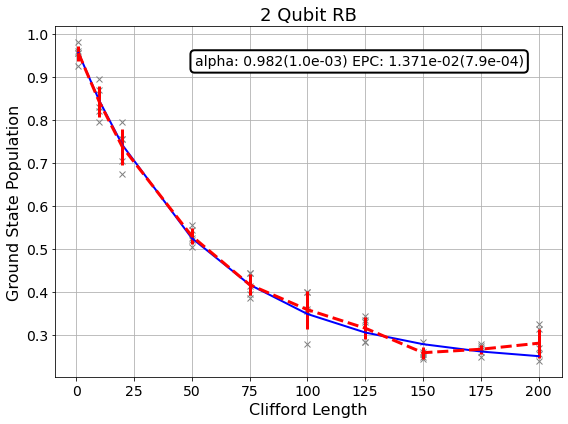

In [33]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rb_fit.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit RB'%(nQ), fontsize=18)

plt.tight_layout()
plt.savefig("figs/rb_%dqubit.pdf" % nQ)
plt.show()

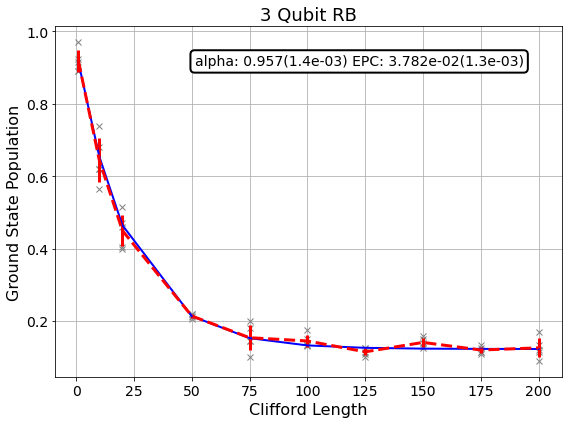

In [45]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rb_fit.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit RB'%(nQ), fontsize=18)

plt.tight_layout()
plt.savefig("figs/rb_%dqubit.pdf" % nQ)
plt.show()

## circuit model 

In [5]:
# Run on a noisy simulator
noise_model = NoiseModel()

# Depolarizing error on the gates u2, u3 and cx (assuming the u1 is virtual-Z gate and no error)
p1Q = 0.001
p2Q = 0.001

noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2 * p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')

backend = qiskit.Aer.get_backend('aer_simulator')

In [8]:
# Create the RB fitter
backend = qiskit.Aer.get_backend('aer_simulator')
basis_gates = ['u1','u2','u3','cx'] 
shots = 200
transpiled_circs_list = []
rb_fit = rb.RBFitter(None, xdata, rb_opts['rb_pattern'])
for rb_seed, rb_circ_seed in enumerate(rb_circs):
    print(f'Compiling seed {rb_seed}')
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    transpiled_circs_list.append(new_rb_circ_seed)
    print(f'Simulating seed {rb_seed}')
    qobj = assemble(new_rb_circ_seed, shots=shots)
    job = backend.run(qobj,
                      noise_model=noise_model,
                      max_parallel_experiments=0)
    # Add data to the fitter
    rb_fit.add_data(job.result())
    print('After seed %d, alpha: %f, EPC: %f'%(rb_seed,rb_fit.fit[0]['params'][1], rb_fit.fit[0]['epc']))

Compiling seed 0
Simulating seed 0
After seed 0, alpha: 0.992251, EPC: 0.006780
Compiling seed 1
Simulating seed 1
After seed 1, alpha: 0.993217, EPC: 0.005935
Compiling seed 2
Simulating seed 2
After seed 2, alpha: 0.992501, EPC: 0.006562
Compiling seed 3
Simulating seed 3
After seed 3, alpha: 0.991987, EPC: 0.007011
Compiling seed 4
Simulating seed 4
After seed 4, alpha: 0.991901, EPC: 0.007087


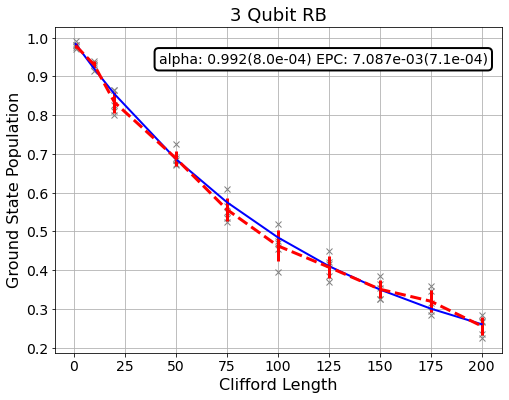

In [9]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rb_fit.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit RB'%(nQ), fontsize=18)

# plt.tight_layout()
# plt.savefig("figs/rb_%dqubit.pdf" % nQ)
plt.show()